# Visualising Sentiment in The Demon Monk

The book is a product of the Rosicrucian affiliation, published in 1939, and it goes some way towards demonstrating the ideological sentiments that religious group wishes to convey. Being a theatre book, there is a great deal of emotional change in the book, which makes it easier to observe the emotional changes and visualisation.

Source of data：https://viewer.soton.ac.uk/records/ao-rosicrucian00426822

## Acquisition of text data and processing

### Getting Text Data

This code snippet does the following:
It imports the os and urllib.request.
These modules provide functionalities for interacting with the operating system and making HTTP requests.

In [1]:
import os
import urllib.request

This code segment is used to define a variable that stores the full path of a text file. This path can be used to access and manipulate the specified text file in Python.

In [2]:
url_to_file = "https://github.com/UniSotonLibrary/notebooks/blob/main/rosicrucian00426822.txt"

This code opens a text file located at the specified path and reads its contents using the UTF-8 encoding. UTF-8 is a character encoding method that allows the representation of characters from the Unicode standard, supporting multiple languages and providing compatibility with ASCII. The content is then stored in the variable text.

In [3]:
with urllib.request.urlopen(url_to_file) as response:
        text = response.read().decode("utf-8")

### Processing of text data

This code searches for the string "Page Four" within the variable text. If the string is found, it prints the starting index of the string in the text. If the string is not found, it prints a message indicating that it was not found.

In [4]:
 start_of_the_book = "Page Four"

index1 = text.find(start_of_the_book)
if index1 != -1:
    print(f"Start of the book found at index {index1}")
else:
    print("Start of the book not found")

Start of the book found at index 175079


This code searches for the string "Thirty-six" in the variable text. If the string is found, it prints the starting index of the string in the text. If the string is not found, it prints a message indicating that it was not found.

In [5]:
 end_of_the_book = "Thirty-six"

index2 = text.find(end_of_the_book)
if index2 != -1:
    print(f"End of the book found at index {index2}")
else:
    print("End of the book not found")

End of the book found at index 232133


This code extracts the content between two specific markers in the text and prints the extracted content.

In [6]:
book = text[index1:index2]
print(book)

Page Four \r","Printed image digitised by the University of Southampton Library Digitisation \r","Unit \r","ACT I. \r","Scene 1 : Discovered : Liveda feebly tugging at the rope bell outside the gate of Childwall Abbey. Monks heard singing in the distance. \r","LivEda {weakly) : \r","Open, in God's name, a Brother seeks rests. \r","Francis (from within) : \r","Content, content, I come, be of good heart, Childwall Abbey opens its gates to all. \r","(Francis opens the gates and Livedo, who has been leaning against them, falls into his arms). \r","LivEda (very weakly) : Food and rest. \r","Francis : \r","Holy Mother of God, he is well spent. Ho, there, Emmanuel, come hither, haste. (enter Emmanuel). \r","Emmanuel : \r","The Lord be with us, he is nigh to death. This pinched face and ghastliness of skin Doth tell of hunger which is long endured. \r","Francis : \r","Come, give assistance, the warmth of kitchen Will his frame give heat and there is wine To circulate his veins, restore t'life.

This code converts the text of the book to lowercase, splits the text using the word "scene" as a separator, and extracts text paragraphs starting from the second occurrence of the separator. Finally, it prints the number of extracted scenes.

In [7]:
scenes = book.lower().split('scene')[1:]
print(len(scenes))

14


This function takes a list of scenes as input, replaces question marks and exclamation marks with fullstops to standardize punctuation. Then, it splits each scene into sentences based on fullstops and returns a list containing all the sentences.

In [8]:
def split_scenes_into_sentences(scenes):
    replaced_qm = scenes.replace('?', '.')
    replaced_qm_and_ex = replaced_qm.replace('!', '.')
    split_by_fullstop = replaced_qm_and_ex.split('.')
    return split_by_fullstop

## Analysing sentiment scores

This function takes a list of scenes as input. It iterates over each scene, splitting it into sentences using the split_scenes_into_sentences function. Then, it appends the list of sentences for each scene to a new list and returns this list of lists containing sentences for each scene.

In [9]:
def sentences_list(scenes):
    sentences = []
    for item in scenes:
        list_of_sentences = split_scenes_into_sentences(item)
        sentences.append(list_of_sentences)
    return sentences

This code is used to download resources required for sentiment analysis using NLTK (Natural Language Toolkit). Specifically, it downloads the sentiment lexicon used by the sentiment analyzer, known as the VADER lexicon. This lexicon contains many English words along with their sentiment scores, which can be utilized for sentiment analysis tasks.

In [10]:
import nltk
nltk.download([
    "vader_lexicon",
])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\msp1u06\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

This code imports the SentimentIntensityAnalyzer class from the nltk.sentiment module. SentimentIntensityAnalyzer is a tool used for analyzing the sentiment of textual data, providing sentiment scores based on the positivity, negativity, neutrality, and compound sentiment of the text.

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

This code imports the matplotlib.pyplot module, which is a plotting library in Python. It allows you to create various types of plots, such as line plots, bar plots, histograms, scatter plots, etc. The 'plt' alias is commonly used for convenience when referencing functions from the matplotlib.pyplot module.

In [12]:
import matplotlib.pyplot as plt

This function calculates the sentiment scores of all sentences in a scene and returns their average sentiment score. It takes a list of sentences as input and computes the sentiment score of each sentence using the SentimentIntensityAnalyzer. Then, it adds the compound sentiment score of each sentence to a list and calculates the average of the list as the average sentiment score of the scene.

In [13]:
#defines a function called get_sentences that takes one argument, scene, representing a scene
def get_sentences(scene):
    #Create an empty list all_sentences to store sentiment scores for each sentence
    all_sentences = []
    #Use SentimentIntensityAnalyzer() to create a sentiment analyser object that can be used to analyse the sentiment tendencies of text
    sia = SentimentIntensityAnalyzer()
    for sentence in scene:
        #The current sentence is analysed for sentiment and a dictionary of sentiment scores is returned, including positive, negative, neutral and compound.
        dict_of_scores = sia.polarity_scores(sentence)
        compound_score = dict_of_scores['compound']
        #Add the compound sentiment score of the current sentence to the all_sentences list
        all_sentences.append(compound_score)
    #Calculate the average of the compound emotion scores for all sentences to reflect the emotional tendency of the whole scene
    average_compound_score = sum(all_sentences)/len(all_sentences)
    return average_compound_score

## Creating Visualisation

This function is responsible for visualizing the sentiment analysis results. It takes three parameters: title, list_of_lab, which represents the labels for the x-axis (e.g., scene names), and data, which contains the corresponding sentiment scores for each label. The function creates a line plot using matplotlib, with the x-axis labeled according to the provided list of labels and the y-axis representing the sentiment scores. Finally, it displays the line plot to visualize the sentiment trends.

In [14]:
def visualisation(title, list_of_lab, data):
    x = list_of_lab
    y = data
    
    plt.figure(figsize=(16, 12))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("labels")
    plt.xticks(rotation=90)
    plt.ylabel("Average Sentiment Score")
    plt.show()

## Main function execution

This code aims to analyze the sentiments of different scenes in a book and visualize the results. It first extracts the content of the book from a text file, then splits the content into sentences based on scenes. Next, it calculates the average sentiment score for each scene through sentiment analysis and generates corresponding labels. Finally, it utilizes the matplotlib library to display the sentiment scores of different scenes as a line plot, illustrating the emotional trends throughout the book.

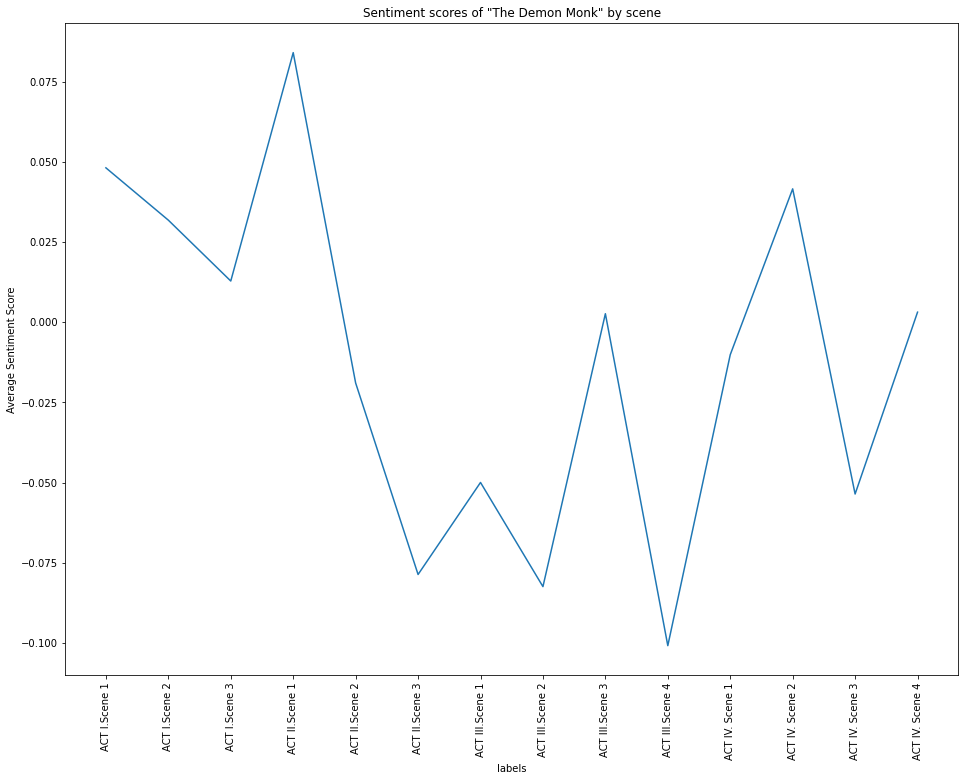

In [15]:
def main():
    #Extracts information from a specified path to get text content
    url_to_file = "https://github.com/UniSotonLibrary/notebooks/blob/main/rosicrucian00426822.txt" 
    with urllib.request.urlopen(url_to_file) as response:
        text = response.read().decode("utf-8")
    #Select a designated section of the book to analyse
    top_of_the_book = "Page Four"
    book = text[index1:index2]
    scenes = book.lower().split('scene')[1:]
    scene_as_sentences = sentences_list(scenes)
    list_of_average_score = []
    for each_scene in scene_as_sentences:
        average_compound_score = get_sentences(each_scene)
        list_of_average_score.append(average_compound_score)
    #Horizontal coordinates according to the number of scopes in the book
    title = 'Sentiment scores of "The Demon Monk" by scene'
    labels = ['ACT I.Scene 1', 'ACT I.Scene 2','ACT I.Scene 3','ACT II.Scene 1', 'ACT II.Scene 2','ACT II.Scene 3','ACT III.Scene 1','ACT III.Scene 2','ACT III.Scene 3','ACT III.Scene 4','ACT IV. Scene 1','ACT IV. Scene 2','ACT IV. Scene 3','ACT IV. Scene 4']
    visualisation(title, labels, list_of_average_score)
    
main()